In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NFWBS_PUF_2016_data.csv to NFWBS_PUF_2016_data.csv


In [ ]:
df = pd.read_csv('NFWBS_PUF_2016_data.csv')

**PART 1: PREPROCESSING**

---



***1. Merging data***

There are certain financial metrics in the survey that consists of multiple survey questions. Each of these questions tend to range between 1 and 5, in which 1 is the worst/most negative/lowest and 5 is the best/most positive/highest. Therefore, we calculate the mean as the overall value for these categorical variables.


In [ ]:
# Calculate the mean of the values
df['FINKNOWL'] = df[['FINKNOWL1','FINKNOWL2','FINKNOWL3']].mean(axis=1)
df['MATERIALISM'] = df[['MATERIALISM_1','MATERIALISM_2','MATERIALISM_3']].mean(axis=1)
df['SELFCONTROL'] = df[['SELFCONTROL_1','SELFCONTROL_2','SELFCONTROL_3']].mean(axis=1)
df['BENEFITS'] = df[['BENEFITS_1','BENEFITS_2','BENEFITS_3','BENEFITS_4','BENEFITS_5']].mean(axis=1)
df['MATHARDSHIP'] = df[['MATHARDSHIP_1','MATHARDSHIP_2','MATHARDSHIP_3','MATHARDSHIP_4','MATHARDSHIP_5','MATHARDSHIP_6']].mean(axis=1)

***2. Selecting variables of interest***

In [ ]:
# Select variables of interest
fin_df = df[['FWBscore','FINKNOWL','FINGOALS','PPINCIMP','BENEFITS','HHEDUC','MORTGAGE','SAVINGSRANGES','MATERIALISM','SELFCONTROL','HEALTH','MATHARDSHIP','EMPLOY']]
print(fin_df.head(10))

   FWBscore  FINKNOWL  FINGOALS  PPINCIMP  BENEFITS  HHEDUC  MORTGAGE  \
0        55  2.000000         1         7       0.2       4         2   
1        51  2.000000         0         6       0.4       2         2   
2        49  2.000000         1         6       0.2       3         2   
3        49  1.333333        -1         8       0.0      -1        -2   
4        49  2.000000         1         7       0.4       2        -2   
5        67  2.000000         1         7       0.8       4         2   
6        51  2.000000         1         7       0.4       4        99   
7        47  2.000000         0         4       0.0       2        -2   
8        43  1.666667         0         7       0.8       2         2   
9        58  2.000000         1         8       0.8       2        98   

   SAVINGSRANGES  MATERIALISM  SELFCONTROL  HEALTH  MATHARDSHIP  EMPLOY  
0              6     4.000000     2.666667       2     1.000000       8  
1              2     3.333333     3.000000      

In [ ]:
# Rename Columns
fin_df.rename(columns={'PPINCIMP': 'INCOME'}, inplace=True)
fin_df.rename(columns={'HHEDUC': 'EDUCATION'}, inplace=True)
fin_df.rename(columns={'SAVINGSRANGES': 'SAVINGS'}, inplace=True)

<ipython-input-7-bf960e35f1ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_df.rename(columns={'PPINCIMP': 'INCOME'}, inplace=True)
<ipython-input-7-bf960e35f1ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_df.rename(columns={'HHEDUC': 'EDUCATION'}, inplace=True)
<ipython-input-7-bf960e35f1ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_df.rename(columns={'SAVINGSRANGES': 'SAVINGS'}, inplace=True)


In [ ]:
# Ranking Financial well being "FWBscore" from 0 to 25 as poor, 26 to 50 as fair, 51 to 75 as good and 76 to 100 as excellent
fin_df.insert(loc = 1, column = 'FWBgrade', value = fin_df['FWBscore'].apply(lambda x: 'Excellent' if x >= 76 else ('Good' if x >= 51 else ('Fair' if x >= 26 else 'Poor'))))

***3. Removing invalid data***

Data points that are 99, 98, -1, -2, -3, -4, or -5 are when the survey participants refused to answer or do not have the exact answer to such questions. Therefore, we remove these rows from the dataset.

In [ ]:
# Remove rows with 99, 98, -1, -2, -3, -4, -5, -0.2
invalid_ans = [99, 98, -1, -2, -3, -4, -5, -0.2]
fin_df = fin_df.replace(invalid_ans, np.nan)
fin_df = fin_df.dropna()

In [ ]:
print(fin_df.head(10))

    FWBscore FWBgrade  FINKNOWL  FINGOALS  INCOME  BENEFITS  EDUCATION  \
0       55.0     Good  2.000000       1.0       7       0.2        4.0   
1       51.0     Good  2.000000       0.0       6       0.4        2.0   
2       49.0     Fair  2.000000       1.0       6       0.2        3.0   
5       67.0     Good  2.000000       1.0       7       0.8        4.0   
8       43.0     Fair  1.666667       0.0       7       0.8        2.0   
11      62.0     Good  2.000000       1.0       8       0.4        5.0   
14      61.0     Good  2.000000       1.0       9       0.8        5.0   
18      69.0     Good  1.333333       0.0       9       0.4        5.0   
20      40.0     Fair  2.333333       1.0       8       0.6        3.0   
22      61.0     Good  2.000000       1.0       8       0.8        5.0   

    MORTGAGE  SAVINGS  MATERIALISM  SELFCONTROL  HEALTH  MATHARDSHIP  EMPLOY  
0        2.0      6.0     4.000000     2.666667     2.0     1.000000     8.0  
1        2.0      2.0     3

**PART 2: DATA EXPLORATION**

---



***1. Summary***

**FWBSCORE** is a composite score representing an individual's overall financial well-being. It's calculated based on various financial aspects such as financial security, financial behavior, and financial literacy. A higher FWBscore indicates better financial well-being, encompassing aspects like the ability to meet financial obligations, manage finances effectively, and plan for the future.

In [ ]:
fin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FWBscore,2988.0,59.700469,13.580754,14.000000,51.000000,59.000000,68.0,95.000000
FINKNOWL,2988.0,1.950803,0.243038,0.000000,2.000000,2.000000,2.0,2.666667
FINGOALS,2988.0,0.687751,0.463488,0.000000,0.000000,1.000000,1.0,1.000000
INCOME,2988.0,6.485274,2.266800,1.000000,5.000000,7.000000,8.0,9.000000
BENEFITS,2988.0,0.517671,0.305154,0.000000,0.200000,0.600000,0.8,1.000000
EDUCATION,2988.0,3.785810,1.066412,1.000000,3.000000,4.000000,5.0,5.000000
MORTGAGE,2988.0,1.759036,0.738375,1.000000,1.000000,2.000000,2.0,3.000000
SAVINGS,2988.0,5.049866,1.561759,1.000000,4.000000,5.000000,6.0,7.000000
MATERIALISM,2988.0,2.596274,0.821487,0.333333,2.000000,2.666667,3.0,5.000000
SELFCONTROL,2988.0,2.644467,0.373774,1.000000,2.333333,2.666667,3.0,4.000000


In [ ]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2988 entries, 0 to 6389
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FWBscore     2988 non-null   float64
 1   FWBgrade     2988 non-null   object 
 2   FINKNOWL     2988 non-null   float64
 3   FINGOALS     2988 non-null   float64
 4   INCOME       2988 non-null   int64  
 5   BENEFITS     2988 non-null   float64
 6   EDUCATION    2988 non-null   float64
 7   MORTGAGE     2988 non-null   float64
 8   SAVINGS      2988 non-null   float64
 9   MATERIALISM  2988 non-null   float64
 10  SELFCONTROL  2988 non-null   float64
 11  HEALTH       2988 non-null   float64
 12  MATHARDSHIP  2988 non-null   float64
 13  EMPLOY       2988 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 350.2+ KB


***2. Quantitative variables***

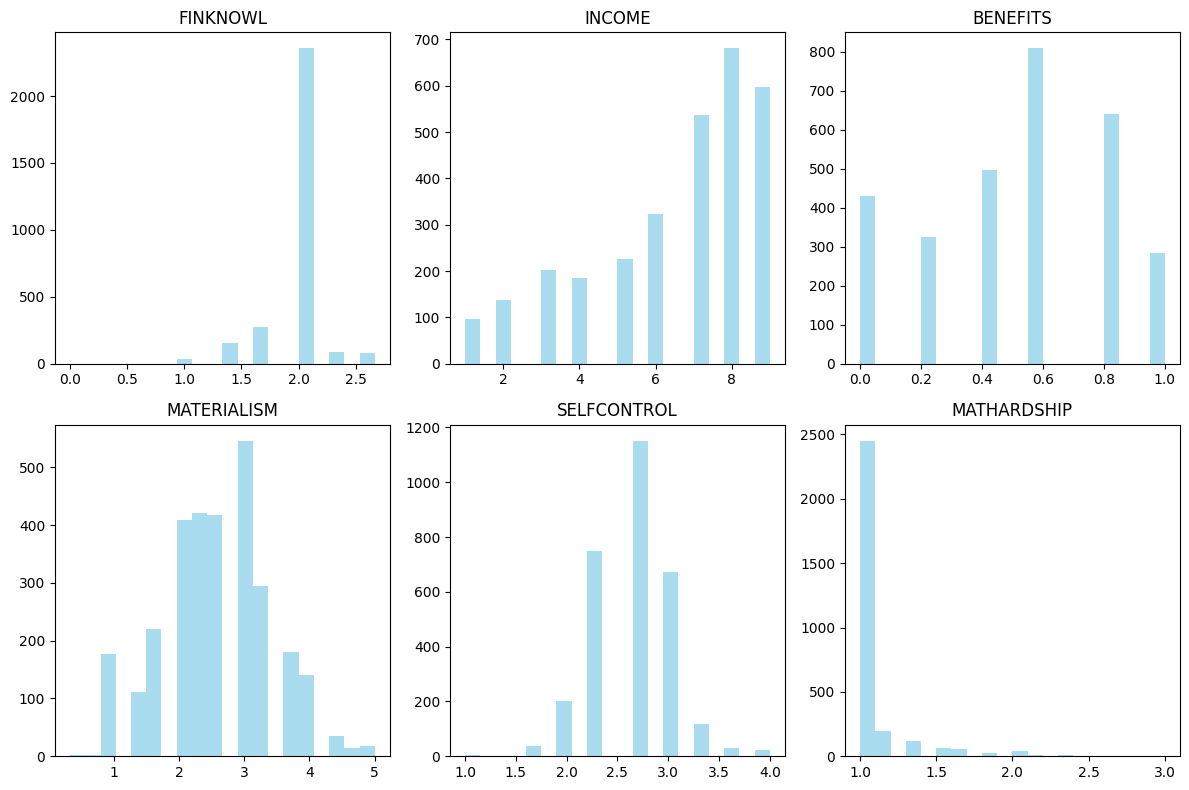

In [46]:
# Identify quantitative variables
quan_var = ['FWBscore','FINKNOWL','INCOME','BENEFITS','MATERIALISM','SELFCONTROL','MATHARDSHIP']

# Set up the subplot grid
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Plot each column in a loop
no_fwbscore = [var for var in quan_var if var != 'FWBscore']
for i, col in enumerate(no_fwbscore):
  axs[i].hist(fin_df[col], bins=20, color='skyblue', alpha=0.7)
  axs[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


***3. Qualitative variables***

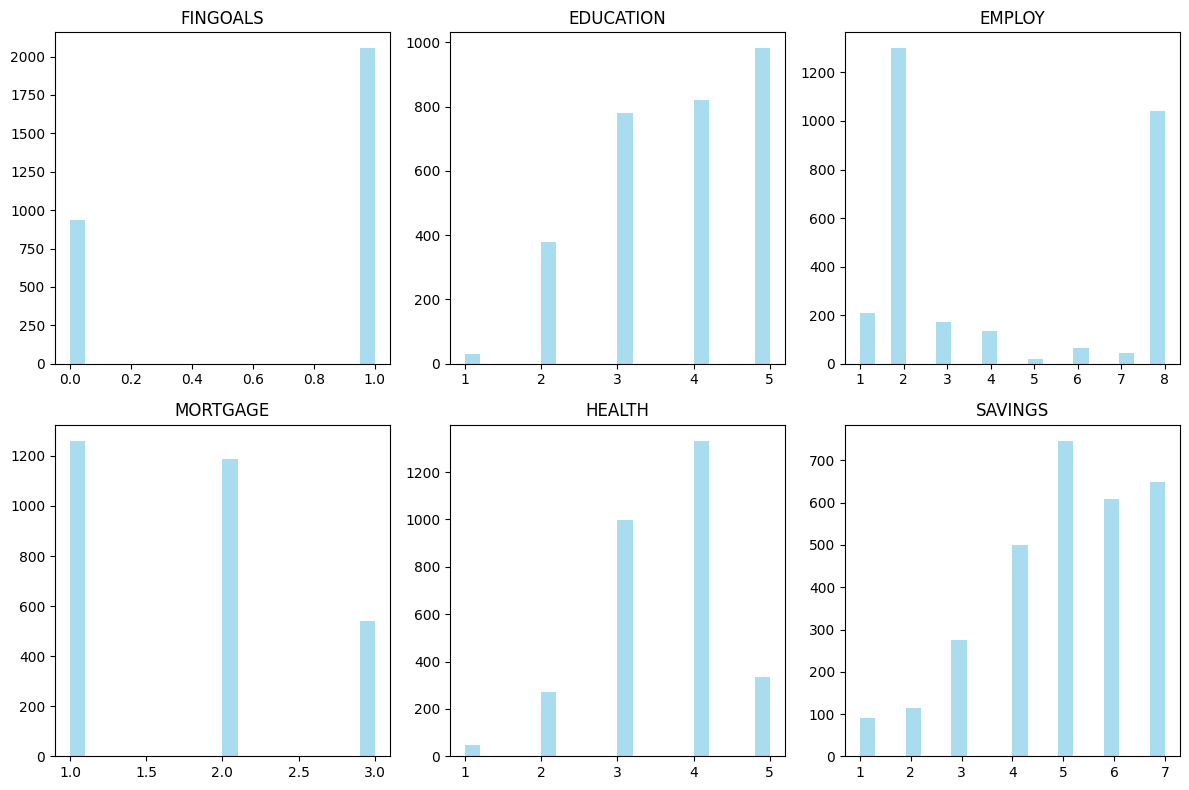

In [45]:
# Select qualitative variables
qual_var = ['FWBgrade','FINGOALS','EDUCATION','EMPLOY','MORTGAGE','HEALTH','SAVINGS']
fin_df['FWBgrade'] = fin_df['FWBgrade'].astype('category')
# Note: other qualitative variables are kept as it because they are ordinal variables, in which the higher value the better.

# Set up the subplot grid
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Plot each column in a loop
no_fwbgrade = [var for var in qual_var if var != 'FWBgrade']
for i, col in enumerate(no_fwbgrade):
  axs[i].hist(fin_df[col], bins=20, color='skyblue', alpha=0.7)
  axs[i].set_title(col)

# Adjust layout
axs[-1].set_visible(True)
plt.tight_layout()
plt.show()

***4. FWBscore and FWBgrade***

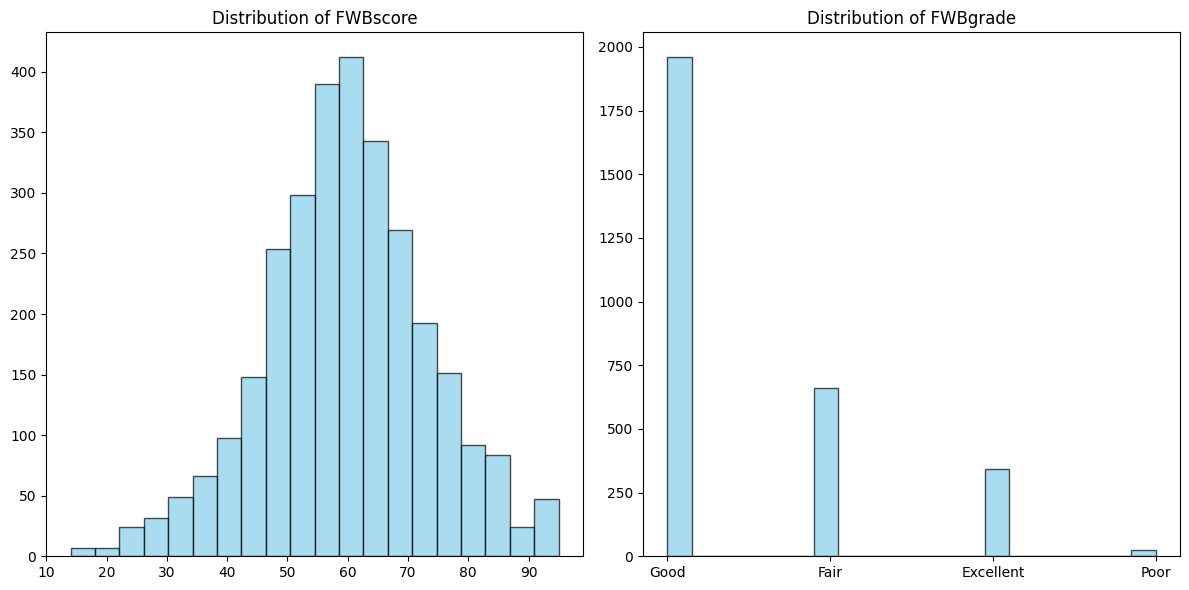

In [ ]:
# Set up the subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot FWBscore and FWBgrade variables
for i, col in enumerate(['FWBscore','FWBgrade']):
  axs[i].hist(fin_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
  title = f'Distribution of {col}'
  axs[i].set_title(title)

# Show plot
plt.tight_layout()
plt.show()

**PART 3: MODEL BUILDING**


---

***1. Classification Models***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Identify target variable and predictor variables
target = fin_df['FWBgrade']
preds = fin_df.loc[:,~fin_df.columns.isin(['FWBgrade','FWBscore'])]

# Train test split
preds_train, preds_test, target_train, target_test = train_test_split(
    preds, target, test_size = 0.3, random_state = 10)

print('Training predictor variables:')
print(preds_train[:5])
print('-'*50)
print('Training target variable:')
print(target_train[:5])
print('-'*50)
print('Testing predictor variables:')
print(preds_test[:5])
print('-'*50)
print('Testing target variable:')
print(target_test[:5])

Training predictor variables:
      FINKNOWL  FINGOALS  INCOME  BENEFITS  EDUCATION  MORTGAGE  SAVINGS  \
4426  2.000000       1.0       7       0.6        4.0       2.0      4.0   
931   2.000000       1.0       7       0.6        5.0       1.0      7.0   
4476  2.000000       1.0       8       0.6        4.0       2.0      4.0   
297   1.666667       1.0       4       0.8        3.0       2.0      4.0   
40    1.666667       0.0       9       0.4        5.0       3.0      6.0   

      MATERIALISM  SELFCONTROL  HEALTH  MATHARDSHIP  EMPLOY  
4426     1.666667     2.333333     3.0     1.000000     8.0  
931      3.333333     2.333333     4.0     1.000000     8.0  
4476     3.666667     2.333333     3.0     1.333333     2.0  
297      2.000000     2.666667     3.0     1.666667     4.0  
40       1.333333     2.000000     4.0     1.000000     8.0  
--------------------------------------------------
Training target variable:
4426    Good
931     Good
4476    Good
297     Poor
40      Good

In [ ]:
# Using 5-fold cross-validation to start building models
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

# Random Forest Classifier
rfcl = RandomForestClassifier(random_state = 10)
rfcl_score = cross_val_score(rfcl, preds_train, target_train, cv=kf).mean()
print(f'Cross validation score for the Random Forest model: {rfcl_score:,.2f}')

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=71, metric='euclidean')
knn_score = cross_val_score(knn, preds_train, target_train, cv=kf).mean()
print(f'Cross validation score for the KNN model: {knn_score:,.2f}')

# Ada Boost Classifier
adb = AdaBoostClassifier(random_state = 10)
adb_score = cross_val_score(adb, preds_train, target_train, cv=kf).mean()
print(f'Cross validation score for the Ada Boost model: {adb_score:,.2f}')

Cross validation score for the Random Forest model: 0.73
Cross validation score for the KNN model: 0.71
Cross validation score for the Ada Boost model: 0.53


Using cross validation score as the metrics to compare different classification models, thus we will continue to tune and evaluate its performance.

In [ ]:
# Fit the data into the model
rfcl.fit(preds_train, target_train)
rfcl.pred_output = rfcl.predict(preds_test)

# Let's take a look at the performance
print('-'*50)
print(f"{'Accuracy Score:':18}{accuracy_score(target_test, rfcl.pred_output)}")
print(f"{'Recall score:':18}{recall_score(target_test, rfcl.pred_output, average = 'weighted')}")
print(f"{'Precision Score:':18}{precision_score(target_test, rfcl.pred_output, average = 'weighted')}")
print(f"{'F1 Score:':18}{f1_score(target_test, rfcl.pred_output, average = 'weighted')}")
print('-'*50)

--------------------------------------------------
Accuracy Score:   0.7212931995540691
Recall score:     0.7212931995540691
Precision Score:  0.7024897491940063
F1 Score:         0.6857667169931393
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Choose the parameters to tune
n_estimators = [50, 100, 150]
max_depth = [1, 50, 100, None]
max_leaf_nodes = [2, 1000, 2988, None]
min_samples_split = [2, 26, 51]
min_samples_leaf = [1, 25, 50]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_leaf_nodes': max_leaf_nodes,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf
              }

In [ ]:
# Use grid search to find the best parameters
best_grid_search_model = GridSearchCV(
    estimator = rfcl, param_grid = param_grid, cv = kf)

best_grid_search_model.fit(preds_train, target_train)

best_params = best_grid_search_model.best_params_
best_params

{'max_depth': 50,
 'max_leaf_nodes': 1000,
 'min_samples_leaf': 1,
 'min_samples_split': 26,
 'n_estimators': 50}

In [ ]:
# Re-evaluate after hyperparameter tuning
best_output = best_grid_search_model.predict(preds_test)

print('Performance after tuning:')
print('-'*50)
print(f"{'Accuracy Score:':18}{accuracy_score(target_test, best_output)}")
print(f"{'Recall score:':18}{recall_score(target_test, best_output, average = 'weighted')}")
print(f"{'Precision Score:':18}{precision_score(target_test, best_output, average = 'weighted')}")
print(f"{'F1 Score:':18}{f1_score(target_test, best_output, average = 'weighted')}")
print('-'*50)

Performance after tuning:
--------------------------------------------------
Accuracy Score:   0.7369007803790413
Recall score:     0.7369007803790413
Precision Score:  0.7402068765975854
F1 Score:         0.6882802185113608
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***2. Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Identify target variable and predictor variables
target = fin_df['FWBscore']
preds = fin_df.loc[:,~fin_df.columns.isin(['FWBgrade','FWBscore'])]

# Train test split
preds_train, preds_test, target_train, target_test = train_test_split(
    preds, target, test_size = 0.3, random_state = 10)

print('Training predictor variables:')
print(preds_train[:5])
print('-'*50)
print('Training target variable:')
print(target_train[:5])
print('-'*50)
print('Testing predictor variables:')
print(preds_test[:5])
print('-'*50)
print('Testing target variable:')
print(target_test[:5])

Training predictor variables:
      FINKNOWL  FINGOALS  INCOME  BENEFITS  EDUCATION  MORTGAGE  SAVINGS  \
4426  2.000000       1.0       7       0.6        4.0       2.0      4.0   
931   2.000000       1.0       7       0.6        5.0       1.0      7.0   
4476  2.000000       1.0       8       0.6        4.0       2.0      4.0   
297   1.666667       1.0       4       0.8        3.0       2.0      4.0   
40    1.666667       0.0       9       0.4        5.0       3.0      6.0   

      MATERIALISM  SELFCONTROL  HEALTH  MATHARDSHIP  EMPLOY  
4426     1.666667     2.333333     3.0     1.000000     8.0  
931      3.333333     2.333333     4.0     1.000000     8.0  
4476     3.666667     2.333333     3.0     1.333333     2.0  
297      2.000000     2.666667     3.0     1.666667     4.0  
40       1.333333     2.000000     4.0     1.000000     8.0  
--------------------------------------------------
Training target variable:
4426    57.0
931     65.0
4476    51.0
297     23.0
40      71.0

In [ ]:
# Run regression
regression_model = LinearRegression()
regression_model.fit(preds_train, target_train)

# Generate the beta coefficients
variables = preds_train.columns
coefficients = regression_model.coef_
reg_coef = pd.DataFrame({'Variable': variables, 'Coefficient': coefficients})
print(reg_coef)

       Variable  Coefficient
0      FINKNOWL     0.781917
1      FINGOALS    -0.444601
2        INCOME     0.967972
3      BENEFITS     0.500128
4     EDUCATION     0.294767
5      MORTGAGE    -1.909015
6       SAVINGS     2.978995
7   MATERIALISM    -0.528563
8   SELFCONTROL     2.528397
9        HEALTH     1.563826
10  MATHARDSHIP   -15.249080
11       EMPLOY     0.700003


In [ ]:
# Evaluate the regression model
reg_pred_output = regression_model.predict(preds_test)

mse = mean_squared_error(target_test, reg_pred_output)
print('-'*50)
print("Mean Squared Error:", mse)

r_squared = r2_score(target_test, reg_pred_output)
print("R-squared:", r_squared)
print('-'*50)

--------------------------------------------------
Mean Squared Error: 99.63665840008031
R-squared: 0.46606219438381713
--------------------------------------------------


In [ ]:
# OLS regression
import statsmodels.api as sm
from scipy import stats

rm = sm.OLS(target_train, preds_train)
rm2 = rm.fit()
rm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               FWBscore   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              6188.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                        0.00
Time:                        01:20:04   Log-Likelihood:                         -7792.5
No. Observations:                2091   AIC:                                  1.561e+04
Df Residuals:                    2079   BIC:                                  1.568e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
FINKNOWL        8.1687      0.743     11.001      0.000       6.712       9.625
FINGOALS       -0.3879      0.493     -0.787      0.432      -1.355       0.579
INCOME          1.0687      0.133      8.037      0.000       0.808       1.329
BENEFITS        0.6464      0.841      0.769      0.442      -1.002       2.295
EDUCATION       0.5710      0.240      2.381      0.017       0.101       1.041
MORTGAGE       -1.3507      0.334     -4.046      0.000      -2.005      -0.696
SAVINGS         3.3713      0.168     20.068      0.000       3.042       3.701
MATERIALISM     0.1258      0.263      0.478      0.633      -0.390       0.642
SELFCONTROL     6.0555      0.543     11.154      0.000       4.991       7.120
HEALTH          2.3693      0.268      8.855      0.000       1.845       2.894
MATHARDSHIP    -8.3487      0.900     -9.280      0.000     -10.113      -6.584
EMPLOY          0.8900      0.088     10.107      0.000       0.717       1.063
==============================================================================
Omnibus:                       36.699   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.649
Skew:                           0.213   Prob(JB):                     1.65e-11
Kurtosis:                       3.623   Cond. No.                         52.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

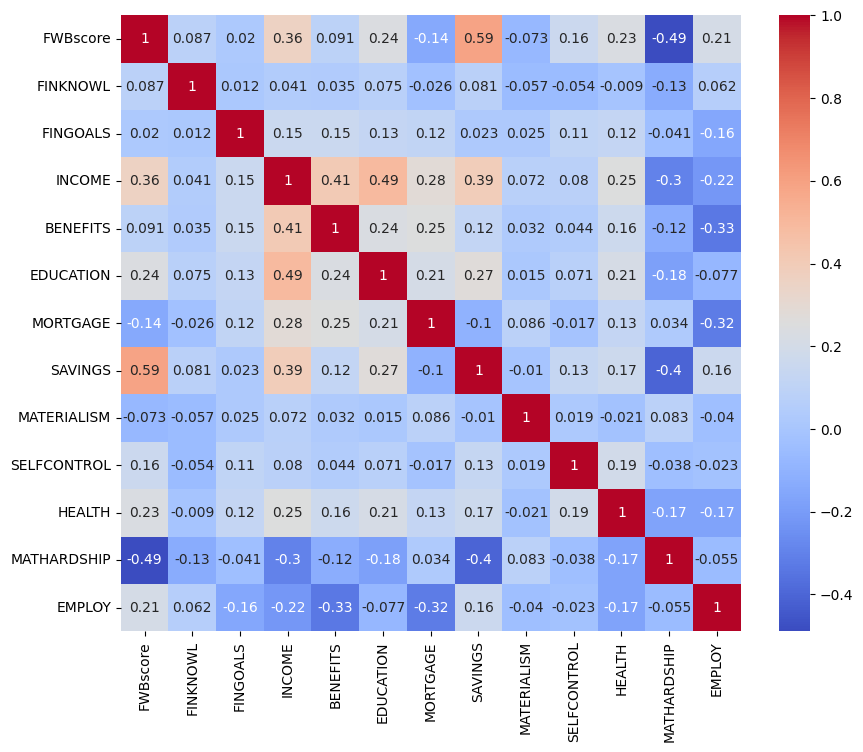

       Variable        VIF
0      FINKNOWL  42.270038
1      FINGOALS   3.408473
2        INCOME  16.949939
3      BENEFITS   5.134610
4     EDUCATION  18.589328
5      MORTGAGE   8.216047
6       SAVINGS  16.345001
7   MATERIALISM  10.885797
8   SELFCONTROL  43.854210
9        HEALTH  19.578567
10  MATHARDSHIP  21.127916
11       EMPLOY   4.217993


In [ ]:
# Detect multicolinearity
correlation = fin_df.loc[:, ~fin_df.columns.isin(['FWBgrade'])].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Use VIF to variables in the regression model that are inflated due to multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = preds.columns

# calculating VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(preds.values, i)
                          for i in range(len(preds.columns))]
print(vif_data)

In [ ]:
# Inflated variables by multicolinearity
inflated_var = []
for i in range(len(vif_data)):
  if vif_data.loc[i, 'VIF'] >= 10:
    inf = vif_data.loc[i, 'Variable']
    inflated_var.append(inf)

# Update the predictor variables for the regresison model
preds_train2 = preds_train.drop(inflated_var, axis=1)
preds_test2 = preds_test.drop(inflated_var, axis=1)

print(preds_train2)
print(preds_test2)

      FINGOALS  BENEFITS  MORTGAGE  EMPLOY
4426       1.0       0.6       2.0     8.0
931        1.0       0.6       1.0     8.0
4476       1.0       0.6       2.0     2.0
297        1.0       0.8       2.0     4.0
40         0.0       0.4       3.0     8.0
...        ...       ...       ...     ...
4092       1.0       0.0       2.0     1.0
2309       1.0       0.4       2.0     8.0
2651       0.0       0.0       2.0     8.0
1007       0.0       0.6       1.0     8.0
2523       1.0       0.0       1.0     1.0

[2091 rows x 4 columns]
      FINGOALS  BENEFITS  MORTGAGE  EMPLOY
5387       0.0       0.2       1.0     6.0
1616       0.0       0.0       2.0     8.0
2198       0.0       1.0       1.0     8.0
356        1.0       0.0       3.0     1.0
3872       1.0       0.6       2.0     2.0
...        ...       ...       ...     ...
677        0.0       0.0       3.0     8.0
2773       1.0       0.6       2.0     2.0
1013       1.0       0.2       1.0     8.0
2953       0.0       0.0     

In [40]:
# Rerun the model
regression_model2 = LinearRegression()
regression_model2.fit(preds_train2, target_train)

# Generate the beta coefficients
variables = preds_train2.columns
coefficients = regression_model2.coef_
reg_coef2 = pd.DataFrame({'Variable': variables, 'Coefficient': coefficients})
print(reg_coef2)

   Variable  Coefficient
0  FINGOALS     1.134074
1  BENEFITS     9.439862
2  MORTGAGE    -2.079859
3    EMPLOY     1.160578


In [ ]:
# Evaluate the regression model
reg_pred_output2 = regression_model2.predict(preds_test2)

mse2 = mean_squared_error(target_test, reg_pred_output2)
print('-'*50)
print("Mean Squared Error:", mse2)

r_squared2 = r2_score(target_test, reg_pred_output2)
print("R-squared:", r_squared2)
print('-'*50)

--------------------------------------------------
Mean Squared Error: 173.291872091448
R-squared: 0.07135502734249255
--------------------------------------------------


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

# Initialize Linear Regression model
regression_model = LinearRegression(fit_intercept=True)

# Initialize RFE with the Linear Regression model and selected number of features
selector = RFE(regression_model, n_features_to_select=5)

# Fit RFE to training data
selector.fit(preds_train, target_train)

# Get selected features
selected_features = preds.columns[selector.support_]
print(f'Selected variables:{selected_features}')

# Train the model using only the selected features
regression_model_selected = LinearRegression(fit_intercept=True)
regression_model_selected.fit(preds_train[selected_features], target_train)

# Define the grid of hyperparameters to search
param_grid = {
    # Empty since there are no hyperparameters to tune for Linear Regression
}

# Create a pipeline with feature scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', regression_model_selected)
])

# Initialize GridSearchCV with the pipeline and the parameter grid
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Perform grid search to find the best hyperparameters
grid_search.fit(preds_train[selected_features], target_train)

# Predict the target variable on the testing data using the model with the best hyperparameters
best_model = grid_search.best_estimator_
target_pred_best = best_model.predict(preds_test[selected_features])

# Calculate MSE and R-squared
mse_best = mean_squared_error(target_test, target_pred_best)
print('-'*50)
print("Mean Squared Error with Best Variables:", mse_best)
r_squared_best = r2_score(target_test, target_pred_best)
print("R-squared with Best Variables:", r_squared_best)
print('-'*50)

Selected variables:Index(['MORTGAGE', 'SAVINGS', 'SELFCONTROL', 'HEALTH', 'MATHARDSHIP'], dtype='object')
--------------------------------------------------
Mean Squared Error with Best Variables: 107.96097872391793
R-squared with Best Variables: 0.4214534188756206
--------------------------------------------------
